# Programming for Psychologists 2024/25: <i>Home assignment.</i>
---
##### Name: Pilitsidis Theodoros (Theo)
##### Email: t.pilitsidis@student.vu.nl
##### Date that was completed: 22/11/2024
##### The data were retrieved from: [Neurosynth-Anxiety](https://neurosynth.org/analyses/terms/anxiety/)
---

#### Import libraries

For the code to run, we need to import the necessary libraries: 
* Nibabel
* Os
* Matplotlib
* Numpy


In [4]:
import nibabel as nib 
import os
import matplotlib.pyplot as plt 
import numpy as np  
from matplotlib.ticker import LogLocator 
from nilearn import plotting 

#### Find the location of the folders

The code cell below is searching for the '.nii.gz' folders in the current directory. For that to happen we need to find the current working directory, by using the `os.getcwd()` function. <br>Then assuming that the data downloaded by the user is in the same folder as this directory, we load them into one great list named files.  <br>After that for each subfolder the program selects only the anatomical or uniformity files accordingly and for better understanding prints them. <br>Finally, it combines the paths and loads the data.  

<i>Note:</i> <br>Instead of using relative paths  to find the current working directory, we can hard type its absolute path (e.g. `data_dir = "C:/User/pilit/OneDrive/Υπολογιστής/Home assignment/anatomical.nii.gz"` ).

In [5]:
# Setting the directory
data_dir = os.getcwd() 

# Listing the files in the directory
files = [f for f in os.listdir(data_dir) if f.endswith('.nii.gz')]
print("Found files:", files)

# Selecting the anatomical and functional data
anatomical_data = next(f for f in files if "anatomical" in f.lower())
functional_data = next(f for f in files if "uniformity" in f.lower())

# Printing the selected data
print("Anatomical data:", anatomical_data)
print("Functional data:", functional_data)

# Loading the data
anatomical_img = nib.load(os.path.join(data_dir, anatomical_data))
functional_img = nib.load(os.path.join(data_dir, functional_data))

Found files: ['anatomical_anxiety.nii.gz', 'anxiety_uniformity-test_z_FDR_0.01.nii.gz']
Anatomical data: anatomical_anxiety.nii.gz
Functional data: anxiety_uniformity-test_z_FDR_0.01.nii.gz


#### Data visualization

In the following code cell, we are visualizing the statistical map associated with anxiety (functional data) on top of a higher resolution MRI scan of the anatomy of the human brain (anatomical scan), retrieved from [Neurosynth.org](https://neurosynth.org/). <br>To be more specific, we start by adding the functional image and setting the anatomical scan as the background picture. We continue by setting our threshold to 0.1 to exclude values below this level, adding a title to indicate which concept term (anxiety) you are visualizing, choosing a colour that highlights the associated areas and choosing our cut coordinates.

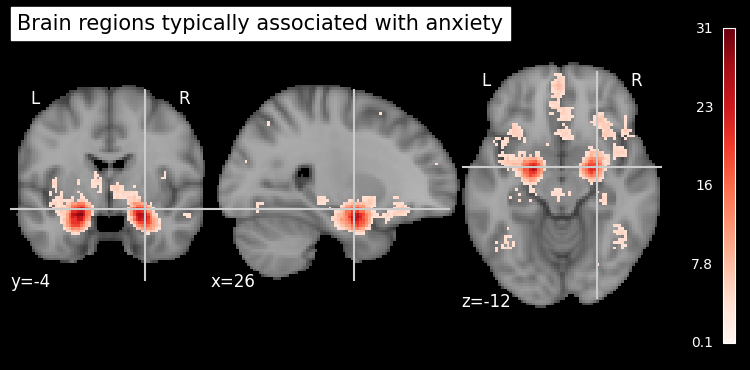

In [6]:
# Ploting the statistical map
plotting.plot_stat_map(
    
    # Adding the functional data
    functional_img, 
    
    # Setting the anatomical scan as the background image
    bg_img=anatomical_img,
       
    # Threshold
    threshold=0.1, 
    
    # Title
    title="Brain regions typically associated with anxiety",
    
    # Colour map
    cmap="Reds", 

    # Data coordinates
    cut_coords=(26, -4, -12) 
)

# Printing the plot
plotting.show()

##### Expected output: <br>
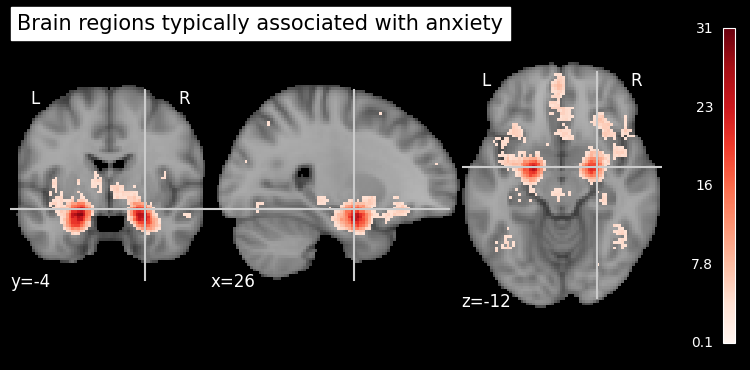

#### Histogram

In the following cell, we load the data from the neuroimaging file and plot its histogram.<br> Specifically, with the use of the `get_fdata()` function we access the image data by converting it to floating-point values.<br>Then with the `ravel()` function we flatten the data to fetch on the next step only the positive values.<br> Finally, with the `hist()` function we visualise  the intensity distribution of the positive values in the image.

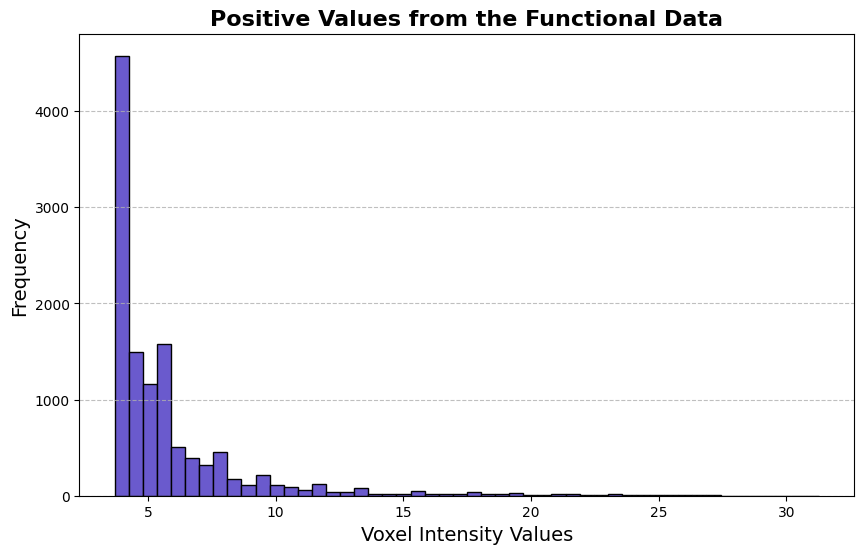

In [12]:
# Selecting all positive values (greater than 0)
functional_data = functional_img.get_fdata()
functional_data_flat = functional_data.ravel()
positive_values = functional_data_flat[functional_data_flat > 0]

############### Plotting the histogram ################

# Setting the figure size
plt.figure(figsize=(10, 6))

# Plotting the histogram
plt.hist(positive_values, bins=50, color="slateblue", edgecolor="black")

# Setting the title, labels and grid
plt.title("Positive Values from the Functional Data", weight='bold', fontsize=16)

# Setting the x and y labels
plt.xlabel("Voxel Intensity Values", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Setting the grid
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Showing the plot
plt.show()

#### Expected output: <br>
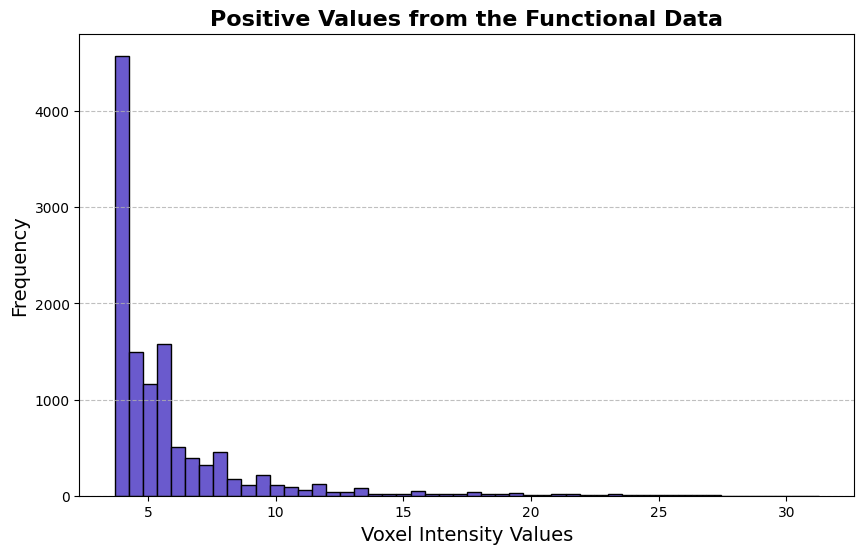

#### Enhanced histogram

The above histogram as plotted does not provide sufficient information, because many intensity values from the voxels are concentrated within the first bin of frequency counts. That means we cannot actually see the differences between them. That can be changed if we change the y labels from linear space (linspace) to logarithmic space (logspace).<br> The default logarithmic space base is 10, however, base 2 is better suited for the interpretation of our data.

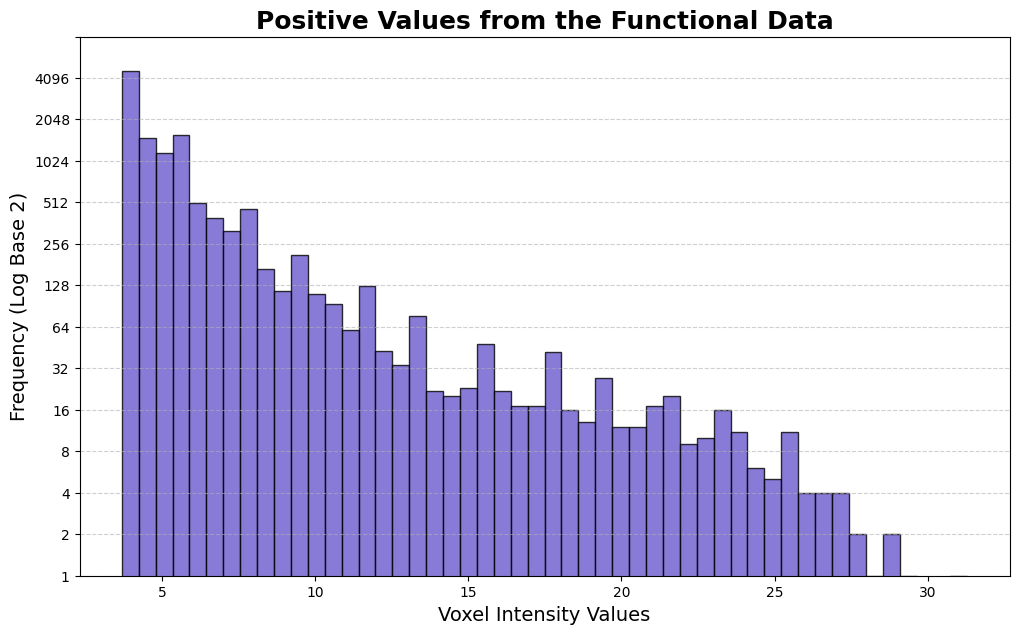

In [ ]:
############### Plotting the histogram ################
plt.figure(figsize=(12, 7))
plt.hist(
    positive_values, 
    bins=50, 
    color="slateblue", 
    edgecolor="black", 
    alpha=0.8 # Setting the transparency level
)

# Seting y-axis to logarithmic base-2 scale
plt.yscale('log', base=2)
plt.ylim(1, 8138)  # Set the y-axis range (minimum > 0 for log scale)

# Customizing ticks
ticks = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8138]
labels = ['1', '2', '4', '8', '16', '32', '64', '128', '256', '512', '1024', '2048', '4096','']
plt.yticks(ticks, labels)

# Adding labels and title
plt.title("Positive Values from the Functional Data", fontsize=18, weight='bold', color='Black')
plt.xlabel("Voxel Intensity Values", fontsize=14, color='Black')
plt.ylabel("Frequency (Log Base 2)", fontsize=14, color='Black')

# Customizing grid
plt.grid(axis='y', which='both', linestyle='--', alpha=0.6)  # Gridlines for both major and minor ticks

# Showing the plot
plt.show()
 

#### Expected output:<br>
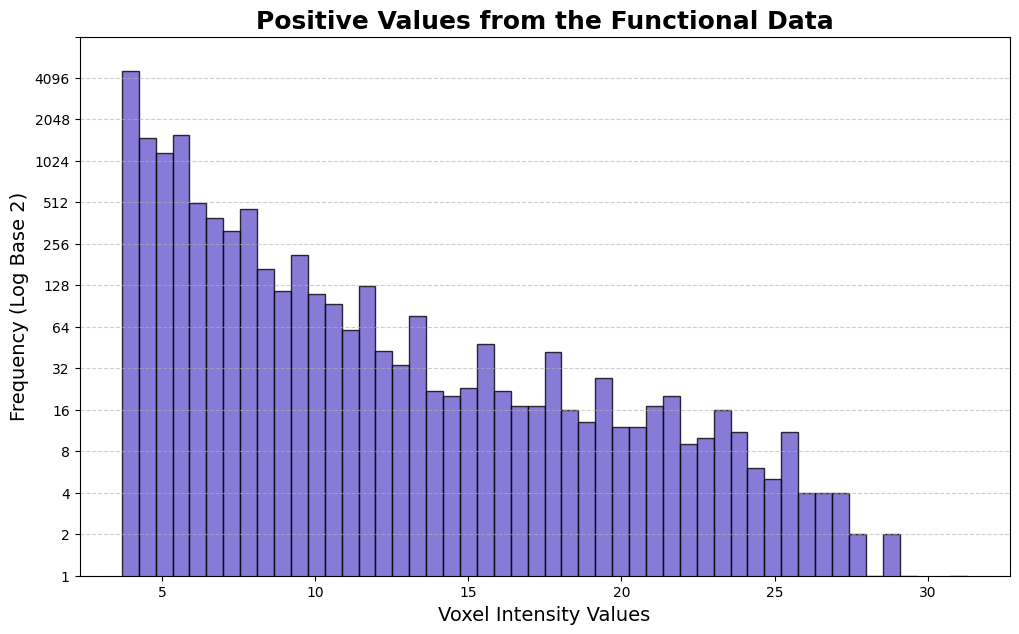